In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from datetime import date
from sklearn.metrics import mean_absolute_percentage_error
import warnings

warnings.filterwarnings('ignore')

In [2]:
ELC = pd.read_csv('/content/ELC.csv',sep=";")
ELC = ELC.dropna() # Drop missing values
ELC= ELC.reset_index(drop=True) # Reset the index

ELC

,Date,Price,High,Low
0,15/12/2016,20446.0,20667.4,19929.3
1,16/12/2016,20298.3,20667.4,19929.3
2,19/12/2016,20298.3,20409.1,20150.7
3,20/12/2016,20076.9,20298.3,19929.3
4,21/12/2016,19855.5,20372.1,19560.2
...,...,...,...,...
1744,11/12/2023,19350.0,19800.0,19250.0
1745,12/12/2023,19350.0,19550.0,19100.0
1746,13/12/2023,18900.0,19400.0,18800.0
1747,14/12/2023,19150.0,19400.0,18850.0


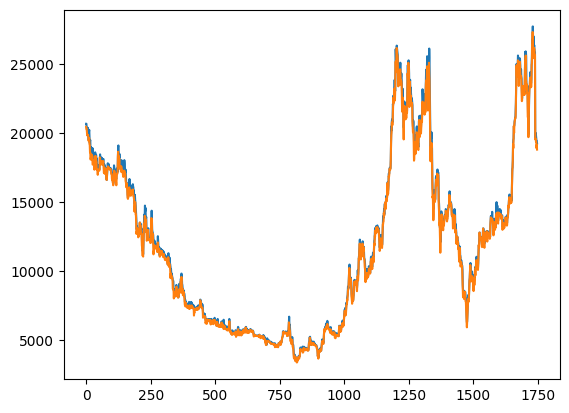

In [3]:
# gán biến
y = ELC[['Price']] # chuỗi thời gian cần dự báo (biến phụ thuộc)
x = ELC[['High']] # các biến độc lập

plt.plot(x)
plt.plot(y)
plt.show()

#7:3

In [4]:
train_size = int(0.7 * len(ELC))
test_size = len(ELC) - train_size

y_train = y[:train_size]
x_train = x[:train_size]
y_test = y[train_size:]
x_test = x[train_size:]

In [5]:
# tạo mô hình svr
svr_rbf = SVR(kernel='rbf', C=1000)
svr_rbf.fit(x_train, y_train)

svr_poly = SVR(kernel='poly', C=1000, degree = 2)
svr_poly.fit(x_train, y_train)

svr_sigmoid = SVR(kernel='sigmoid')
svr_sigmoid.fit(x_train, y_train)

SVR(kernel='sigmoid')

In [6]:
# dự đoán giá đóng cửa của FPT trên tập kiểm tra
y_pred_rbf = svr_rbf.predict(x_test)
y_pred_rbf = y_pred_rbf.reshape(-1,1)

y_pred_poly = svr_poly.predict(x_test)
y_pred_poly = y_pred_poly.reshape(-1,1)

y_pred_sigmoid = svr_sigmoid.predict(x_test)
y_pred_sigmoid= y_pred_sigmoid.reshape(-1,1)

In [7]:

# tính toán độ chính xác của mô hình
mape_rbf = mean_absolute_percentage_error(y_test, y_pred_rbf) * 100
mae_rbf = mean_absolute_error(y_test, y_pred_rbf)
test_rmse_rbf = np.sqrt(np.mean((y_pred_rbf - y_test)**2))

mape_poly = mean_absolute_percentage_error(y_test, y_pred_poly) * 100
mae_poly = mean_absolute_error(y_test, y_pred_poly)
test_rmse_poly = np.sqrt(np.mean((y_pred_poly - y_test)**2))


mape_sigmoid = mean_absolute_percentage_error(y_test, y_pred_sigmoid) * 100
mae_sigmoid = mean_absolute_error(y_test, y_pred_sigmoid)
test_rmse_sigmoid = np.sqrt(np.mean((y_pred_sigmoid - y_test)**2))

In [8]:
# in kết quả độ chính xác của mô hình
print("RBF MAPE:", mape_rbf)
print("RBF MAE: ",  mae_rbf)
print("RBF Testing RMSE:", test_rmse_rbf)

print("Poly MAPE:", mape_poly)
print("Poly MAE:",  mae_poly)
print("Poly Testing RMSE:", test_rmse_poly)

print("Sigmoid MAPE:", mape_sigmoid)
print("Sigmoid MAE:",  mae_sigmoid)
print("Sigmoid Testing RMSE:", test_rmse_sigmoid)

RBF MAPE: 1.6956303313572094
RBF MAE:  295.08279915253274
RBF Testing RMSE: Price    532.441377
dtype: float64
Poly MAPE: 12.024117058673836
Poly MAE: 2242.7732943419733
Poly Testing RMSE: Price    3037.288997
dtype: float64
Sigmoid MAPE: 50.1057512694083
Sigmoid MAE: 9063.083729867438
Sigmoid Testing RMSE: Price    10405.665072
dtype: float64


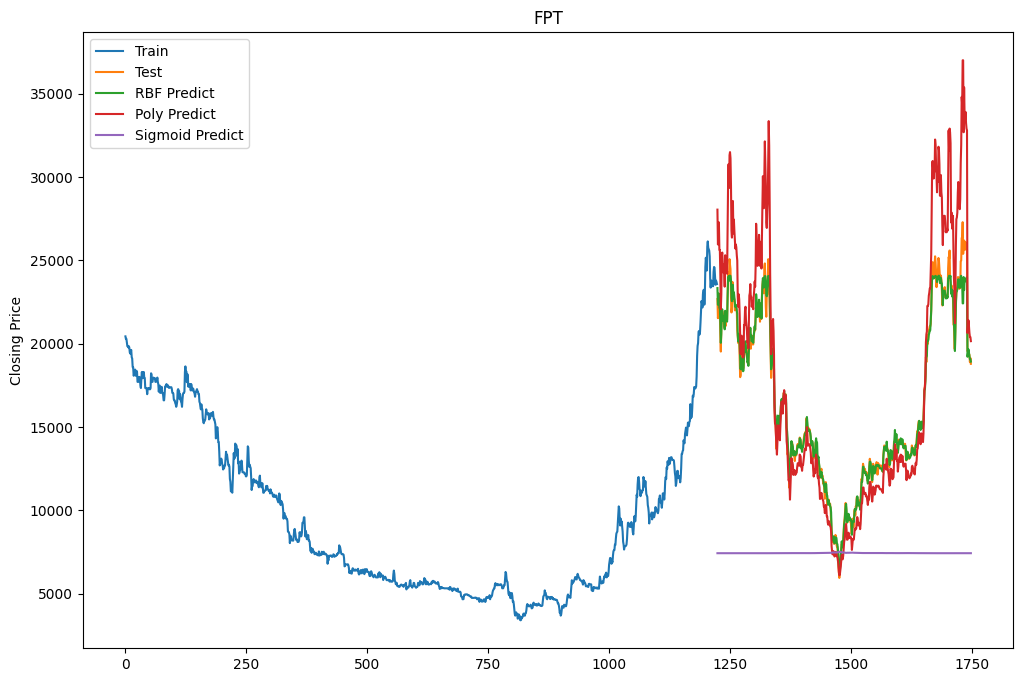

In [9]:
#vẽ mô hình
plt.figure(figsize=(12, 8))
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(x_test.index, y_pred_rbf, label='RBF Predict')
plt.plot(x_test.index, y_pred_poly, label='Poly Predict')
plt.plot(x_test.index, y_pred_sigmoid, label='Sigmoid Predict')
plt.ylabel('Closing Price')
plt.title('FPT')
plt.legend()
plt.show()

In [10]:
# láy giá trị Price của ngày cuối cùng trong dataset
last_index = ELC.index[-1]
last_row = ELC.tail(1)
last_data = last_row['Price'].values.reshape(-1,1)
last_data



array([[18800.]])

In [11]:
# tạo mảng chứa giá trị predict của 30 ngày tiếp theo
x_next_30_day_rbf = []
x_next_30_day_poly = []
x_next_30_day_sigmoid = []
index_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
# predict giá Price 30 ngày tiếp theo dựa vào giá Close của ngày trước đó
for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_day_rbf.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_day_poly.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

for i in range(30):
    x_pred_next = svr_sigmoid.predict(last_data)
    x_next_30_day_sigmoid.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

print("Kết quả dự đoán sử dụng RBF:", x_next_30_day_rbf)
print("Kết quả dự đoán sử dụng Poly:", x_next_30_day_poly)
print("Kết quả dự đoán sử dụng Poly:", x_next_30_day_sigmoid)

Kết quả dự đoán sử dụng RBF: [array([18505.71448594]), array([18228.86832858]), array([17969.10166164]), array([17725.13821736]), array([17495.24253527]), array([17277.53166141]), array([17070.16026679]), array([16871.41644931]), array([16679.7621124]), array([16493.84226058]), array([16312.47863662]), array([16134.65666903]), array([15959.51054365]), array([15786.30871547]), array([15614.44074135]), array([15443.40552236]), array([15272.80063472]), array([15102.31224816]), array([14931.70509835]), array([14760.81204952]), array([14589.5229277]), array([14417.77250002]), array([14245.52769449]), array([14072.77436855]), array([13899.50411089]), array([13725.70167468]), array([13551.33367718]), array([13376.33916223]), array([13200.62252654]), array([13024.04918735])]
Kết quả dự đoán sử dụng Poly: [array([12846.44425132]), array([12667.5943613]), array([12487.25286747]), array([12305.14849359]), array([12120.99773235]), array([11934.52127179]), array([11745.46477192]), array([11553.6242

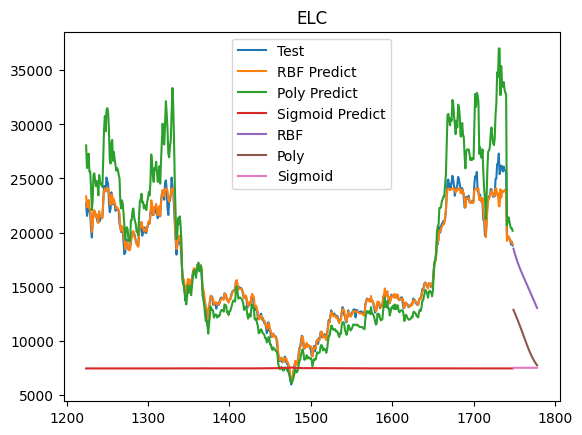

In [13]:
#vẽ mô hình
#plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Test')
plt.plot(x_test.index, y_pred_rbf, label='RBF Predict')
plt.plot(x_test.index, y_pred_poly, label='Poly Predict')
plt.plot(x_test.index, y_pred_sigmoid, label='Sigmoid Predict')

# Vẽ biểu đồ dự đoán sử dụng RBF
plt.plot(index_next_30_days,x_next_30_day_rbf, label='RBF')
# Vẽ biểu đồ dự đoán sử dụng Poly
plt.plot(index_next_30_days,x_next_30_day_poly, label='Poly')
# Vẽ biểu đồ dự đoán sử dụng Sigmoid
plt.plot(index_next_30_days,x_next_30_day_sigmoid, label='Sigmoid')
plt.title('ELC')
plt.legend()
plt.show()

#8:2

In [14]:
train_size = int(0.8 * len(ELC))
test_size = len(ELC) - train_size

y_train = y[:train_size]
x_train = x[:train_size]
y_test = y[train_size:]
x_test = x[train_size:]

In [15]:
# tạo mô hình svr
svr_rbf = SVR(kernel='rbf', C=1000)
svr_rbf.fit(x_train, y_train)

svr_poly = SVR(kernel='poly', C=1000, degree = 2)
svr_poly.fit(x_train, y_train)

svr_sigmoid = SVR(kernel='sigmoid')
svr_sigmoid.fit(x_train, y_train)

SVR(kernel='sigmoid')

In [16]:
# dự đoán giá đóng cửa của FPT trên tập kiểm tra
y_pred_rbf = svr_rbf.predict(x_test)
y_pred_rbf = y_pred_rbf.reshape(-1,1)

y_pred_poly = svr_poly.predict(x_test)
y_pred_poly = y_pred_poly.reshape(-1,1)

y_pred_sigmoid = svr_sigmoid.predict(x_test)
y_pred_sigmoid= y_pred_sigmoid.reshape(-1,1)

In [17]:

# tính toán độ chính xác của mô hình
mape_rbf = mean_absolute_percentage_error(y_test, y_pred_rbf) * 100
mae_rbf = mean_absolute_error(y_test, y_pred_rbf)
test_rmse_rbf = np.sqrt(np.mean((y_pred_rbf - y_test)**2))

mape_poly = mean_absolute_percentage_error(y_test, y_pred_poly) * 100
mae_poly = mean_absolute_error(y_test, y_pred_poly)
test_rmse_poly = np.sqrt(np.mean((y_pred_poly - y_test)**2))


mape_sigmoid = mean_absolute_percentage_error(y_test, y_pred_sigmoid) * 100
mae_sigmoid = mean_absolute_error(y_test, y_pred_sigmoid)
test_rmse_sigmoid = np.sqrt(np.mean((y_pred_sigmoid - y_test)**2))

In [18]:
# in kết quả độ chính xác của mô hình
print("RBF MAPE:", mape_rbf)
print("RBF MAE: ",  mae_rbf)
print("RBF Testing RMSE:", test_rmse_rbf)

print("Poly MAPE:", mape_poly)
print("Poly MAE:",  mae_poly)
print("Poly Testing RMSE:", test_rmse_poly)

print("Sigmoid MAPE:", mape_sigmoid)
print("Sigmoid MAE:",  mae_sigmoid)
print("Sigmoid Testing RMSE:", test_rmse_sigmoid)

RBF MAPE: 1.6427196622241687
RBF MAE:  268.6275264845169
RBF Testing RMSE: Price    486.46913
dtype: float64
Poly MAPE: 11.528324025957078
Poly MAE: 1897.033796928783
Poly Testing RMSE: Price    2443.605355
dtype: float64
Sigmoid MAPE: 35.43039116424958
Sigmoid MAE: 6259.820821214942
Sigmoid Testing RMSE: Price    8046.500007
dtype: float64


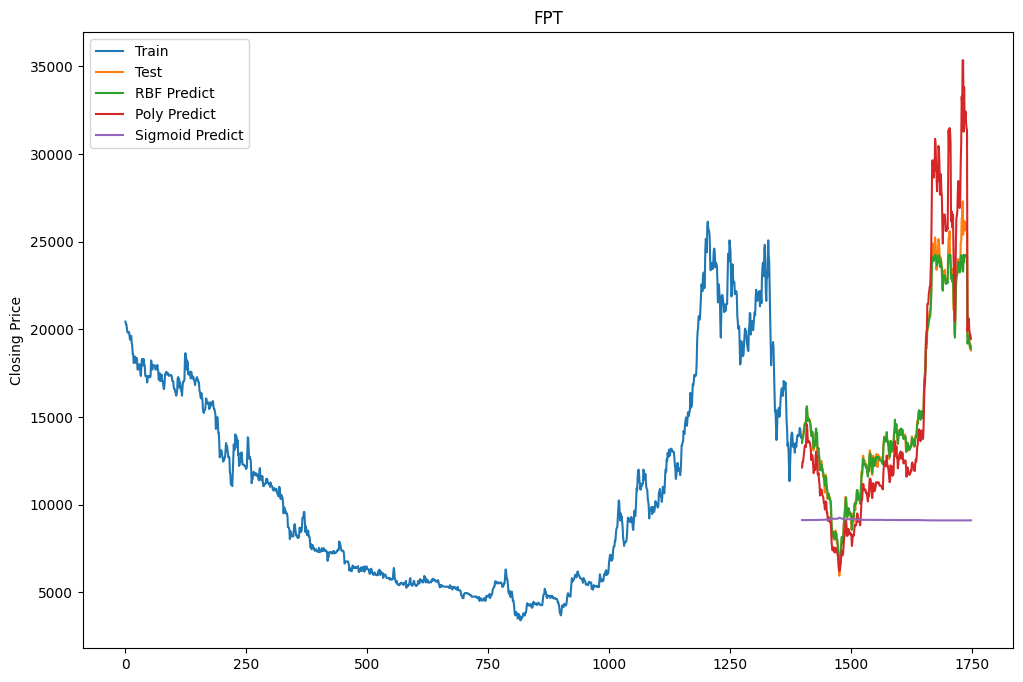

In [19]:
#vẽ mô hình
plt.figure(figsize=(12, 8))
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(x_test.index, y_pred_rbf, label='RBF Predict')
plt.plot(x_test.index, y_pred_poly, label='Poly Predict')
plt.plot(x_test.index, y_pred_sigmoid, label='Sigmoid Predict')
plt.ylabel('Closing Price')
plt.title('FPT')
plt.legend()
plt.show()


In [20]:
# láy giá trị Price của ngày cuối cùng trong dataset
last_index = ELC.index[-1]
last_row = ELC.tail(1)
last_data = last_row['Price'].values.reshape(-1,1)
last_data

array([[18800.]])

In [21]:
# tạo mảng chứa giá trị predict của 30 ngày tiếp theo
x_next_30_day_rbf = []
x_next_30_day_poly = []
x_next_30_day_sigmoid = []
index_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
# predict giá Price 30 ngày tiếp theo dựa vào giá Close của ngày trước đó
for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_day_rbf.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_day_poly.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

for i in range(30):
    x_pred_next = svr_sigmoid.predict(last_data)
    x_next_30_day_sigmoid.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

print("Kết quả dự đoán sử dụng RBF:", x_next_30_day_rbf)
print("Kết quả dự đoán sử dụng Poly:", x_next_30_day_poly)
print("Kết quả dự đoán sử dụng Poly:", x_next_30_day_sigmoid)

Kết quả dự đoán sử dụng RBF: [array([18474.62261571]), array([18169.54355093]), array([17884.651994]), array([17618.86067993]), array([17370.54644288]), array([17137.86713573]), array([16918.96111798]), array([16712.05817533]), array([16515.53185324]), array([16327.91650192]), array([16147.90479978]), array([15974.33555763]), array([15806.17752542]), array([15642.51234937]), array([15482.51829062]), array([15325.4554383]), array([15170.65267082]), array([15017.4963735]), array([14865.42080879]), array([14713.89999729]), array([14562.44097084]), array([14410.5782831]), array([14257.86969909]), array([14103.8930275]), array([13948.24410543]), array([13790.53599315]), array([13630.39948606]), array([13467.48509821]), array([13301.46671498]), array([13132.04714356])]
Kết quả dự đoán sử dụng Poly: [array([12958.96579872]), array([12782.00873358]), array([12601.02113823]), array([12415.92225946]), array([12226.72241454]), array([12033.54136161]), array([11836.62674756]), array([11636.3707191

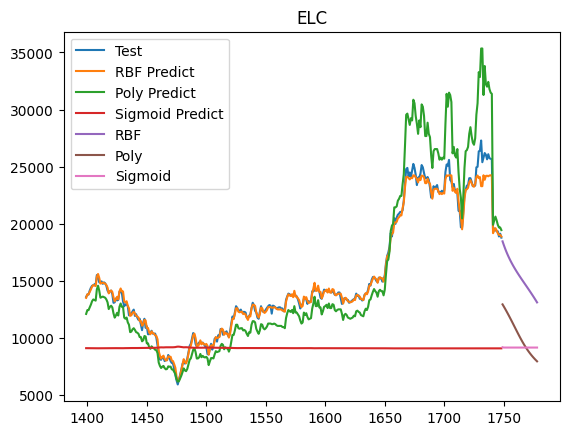

In [22]:
#vẽ mô hình
#plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Test')
plt.plot(x_test.index, y_pred_rbf, label='RBF Predict')
plt.plot(x_test.index, y_pred_poly, label='Poly Predict')
plt.plot(x_test.index, y_pred_sigmoid, label='Sigmoid Predict')

# Vẽ biểu đồ dự đoán sử dụng RBF
plt.plot(index_next_30_days,x_next_30_day_rbf, label='RBF')
# Vẽ biểu đồ dự đoán sử dụng Poly
plt.plot(index_next_30_days,x_next_30_day_poly, label='Poly')
# Vẽ biểu đồ dự đoán sử dụng Sigmoid
plt.plot(index_next_30_days,x_next_30_day_sigmoid, label='Sigmoid')
plt.title('ELC')
plt.legend()
plt.show()

# 9:1

In [23]:
train_size = int(0.9 * len(ELC))
test_size = len(ELC) - train_size

y_train = y[:train_size]
x_train = x[:train_size]
y_test = y[train_size:]
x_test = x[train_size:]

In [24]:
# tạo mô hình svr
svr_rbf = SVR(kernel='rbf', C=1000)
svr_rbf.fit(x_train, y_train)

svr_poly = SVR(kernel='poly', C=1000, degree = 2)
svr_poly.fit(x_train, y_train)

svr_sigmoid = SVR(kernel='sigmoid')
svr_sigmoid.fit(x_train, y_train)

SVR(kernel='sigmoid')

In [25]:
# dự đoán giá đóng cửa của FPT trên tập kiểm tra
y_pred_rbf = svr_rbf.predict(x_test)
y_pred_rbf = y_pred_rbf.reshape(-1,1)

y_pred_poly = svr_poly.predict(x_test)
y_pred_poly = y_pred_poly.reshape(-1,1)

y_pred_sigmoid = svr_sigmoid.predict(x_test)
y_pred_sigmoid= y_pred_sigmoid.reshape(-1,1)

In [26]:

# tính toán độ chính xác của mô hình
mape_rbf = mean_absolute_percentage_error(y_test, y_pred_rbf) * 100
mae_rbf = mean_absolute_error(y_test, y_pred_rbf)
test_rmse_rbf = np.sqrt(np.mean((y_pred_rbf - y_test)**2))

mape_poly = mean_absolute_percentage_error(y_test, y_pred_poly) * 100
mae_poly = mean_absolute_error(y_test, y_pred_poly)
test_rmse_poly = np.sqrt(np.mean((y_pred_poly - y_test)**2))


mape_sigmoid = mean_absolute_percentage_error(y_test, y_pred_sigmoid) * 100
mae_sigmoid = mean_absolute_error(y_test, y_pred_sigmoid)
test_rmse_sigmoid = np.sqrt(np.mean((y_pred_sigmoid - y_test)**2))

In [27]:
# in kết quả độ chính xác của mô hình
print("RBF MAPE:", mape_rbf)
print("RBF MAE: ",  mae_rbf)
print("RBF Testing RMSE:", test_rmse_rbf)

print("Poly MAPE:", mape_poly)
print("Poly MAE:",  mae_poly)
print("Poly Testing RMSE:", test_rmse_poly)

print("Sigmoid MAPE:", mape_sigmoid)
print("Sigmoid MAE:",  mae_sigmoid)
print("Sigmoid Testing RMSE:", test_rmse_sigmoid)

RBF MAPE: 1.7041690344955582
RBF MAE:  368.92794179657864
RBF Testing RMSE: Price    656.867413
dtype: float64
Poly MAPE: 12.36119551123032
Poly MAE: 2615.639838671763
Poly Testing RMSE: Price    3351.264604
dtype: float64
Sigmoid MAPE: 44.42252668302571
Sigmoid MAE: 9087.787702049556
Sigmoid Testing RMSE: Price    10283.444831
dtype: float64


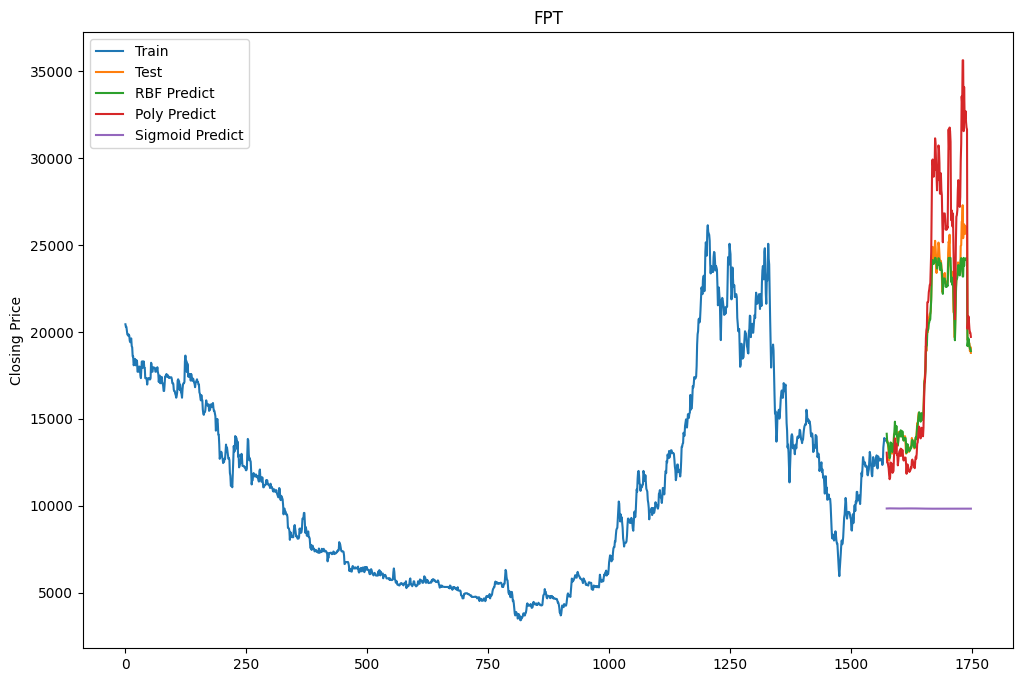

In [28]:
#vẽ mô hình
plt.figure(figsize=(12, 8))
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(x_test.index, y_pred_rbf, label='RBF Predict')
plt.plot(x_test.index, y_pred_poly, label='Poly Predict')
plt.plot(x_test.index, y_pred_sigmoid, label='Sigmoid Predict')
plt.ylabel('Closing Price')
plt.title('FPT')
plt.legend()
plt.show()

In [29]:
# láy giá trị Price của ngày cuối cùng trong dataset
last_index = ELC.index[-1]
last_row = ELC.tail(1)
last_data = last_row['Price'].values.reshape(-1,1)
last_data

array([[18800.]])

In [30]:
# tạo mảng chứa giá trị predict của 30 ngày tiếp theo
x_next_30_day_rbf = []
x_next_30_day_poly = []
x_next_30_day_sigmoid = []
index_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
# predict giá Price 30 ngày tiếp theo dựa vào giá Close của ngày trước đó
for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_day_rbf.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_day_poly.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

for i in range(30):
    x_pred_next = svr_sigmoid.predict(last_data)
    x_next_30_day_sigmoid.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

print("Kết quả dự đoán sử dụng RBF:", x_next_30_day_rbf)
print("Kết quả dự đoán sử dụng Poly:", x_next_30_day_poly)
print("Kết quả dự đoán sử dụng Poly:", x_next_30_day_sigmoid)

Kết quả dự đoán sử dụng RBF: [array([18483.75986364]), array([18188.09945905]), array([17911.72412052]), array([17652.77308258]), array([17409.20423418]), array([17179.02119784]), array([16960.38829295]), array([16751.67607506]), array([16551.46810674]), array([16358.54821616]), array([16171.8793339]), array([15990.57985612]), array([15813.90048413]), array([15641.20284068]), array([15471.9403059]), array([15305.64110127]), array([15141.89347322]), array([14980.33277253]), array([14820.63022577]), array([14662.48321836]), array([14505.60693646]), array([14349.727241]), array([14194.57466901]), array([14039.87947587]), array([13885.36765018]), array([13730.75785227]), array([13575.75925211]), array([13420.07027311]), array([13263.37828844]), array([13105.36036613])]
Kết quả dự đoán sử dụng Poly: [array([12945.68521812]), array([12784.01657621]), array([12620.01828886]), array([12453.36150029]), array([12283.73432284]), array([12110.85442343]), array([11934.48488247]), array([11754.45350

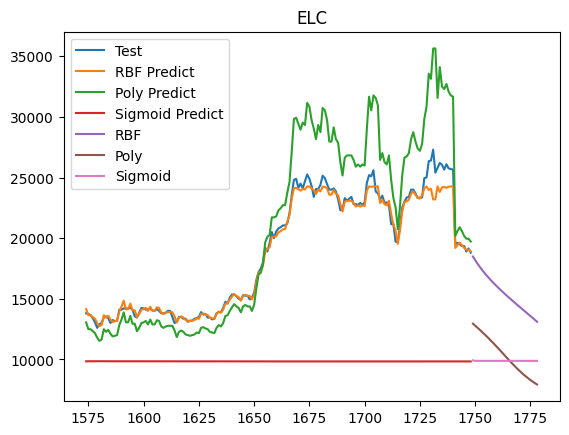

In [31]:
#vẽ mô hình
#plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Test')
plt.plot(x_test.index, y_pred_rbf, label='RBF Predict')
plt.plot(x_test.index, y_pred_poly, label='Poly Predict')
plt.plot(x_test.index, y_pred_sigmoid, label='Sigmoid Predict')

# Vẽ biểu đồ dự đoán sử dụng RBF
plt.plot(index_next_30_days,x_next_30_day_rbf, label='RBF')
# Vẽ biểu đồ dự đoán sử dụng Poly
plt.plot(index_next_30_days,x_next_30_day_poly, label='Poly')
# Vẽ biểu đồ dự đoán sử dụng Sigmoid
plt.plot(index_next_30_days,x_next_30_day_sigmoid, label='Sigmoid')
plt.title('ELC')
plt.legend()
plt.show()